## 1. Loading the Data Set: 

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [18]:
df = pd.read_csv('ks-projects-201612.csv',encoding='latin1')
df

C:\Anaconda3\envs\python-cvcourse\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (13,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,NaN
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,NaN
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,NaN
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,NaN,NaN,NaN,NaN
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323745,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17 02:35:30,50000,2014-09-17 02:35:30,25,canceled,1,US,25,NaN,NaN,NaN,NaN
323746,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19 03:35:14,1500,2011-06-22 03:35:14,155,failed,5,US,155,NaN,NaN,NaN,NaN
323747,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16 05:59:00,15000,2010-07-01 19:40:30,20,failed,1,US,20,NaN,NaN,NaN,NaN
323748,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13 02:00:00,15000,2016-01-13 18:13:53,200,failed,6,US,200,NaN,NaN,NaN,NaN


## 2. Check for Missing Data:

In [19]:
print(df.isnull().sum())

ID                     0
name                   4
category               5
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3790
Unnamed: 13       323125
Unnamed: 14       323738
Unnamed: 15       323746
Unnamed: 16       323749
dtype: int64


In [20]:
n=4
df = df.iloc[:, :-n]

## 3.Understanding the Data Set:

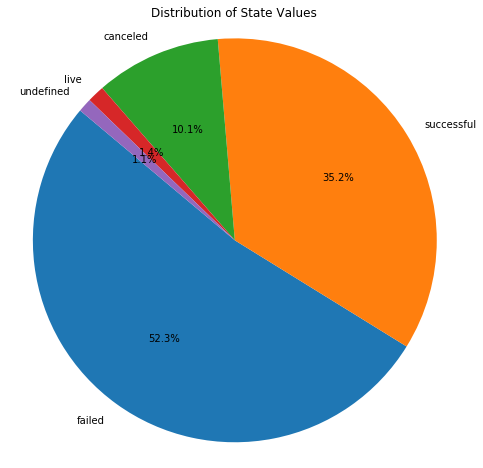

In [21]:
# Finding the number of values in the State column
state_counts = df['state '].value_counts()

filtered_state_counts = state_counts[state_counts / len(df) > 0.01]
# Creating labels and values for the pie chart
labels = filtered_state_counts.index
values = filtered_state_counts.values

# Visualization
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of State Values')
plt.axis('equal')  

plt.show()

In [22]:
missing_rows = df[df.isnull().any(axis=1)]
# delete rows with the value 'live' in the 'state' column directly
df.drop(df[df['state '] == 'live'].index, inplace=True)
# delete rows that are "undefined" in the "state" column from the dataset
df = df[df['state '] != 'undefined']
# filling the null values in the 'usd pledged' column with the 'pledged' value
df['usd pledged '].fillna(df['pledged '], inplace=True)
df.dropna(inplace=True)

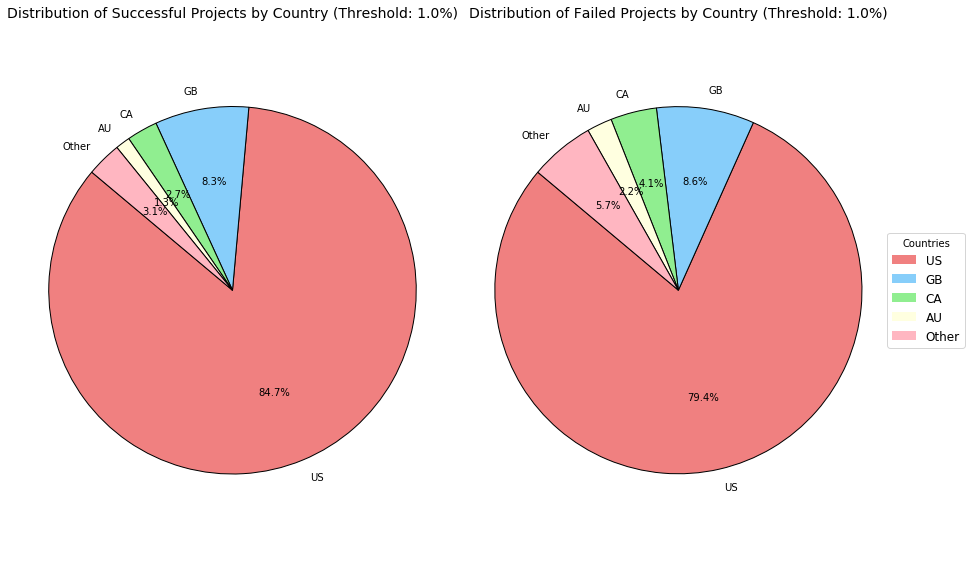

In [23]:
# Analyzing the distribution of successful projects by country
successful_projects = df[df['state '] == 'successful']
successful_country_counts = successful_projects['country '].value_counts()

# Analyzing data to calculate the distribution of failed projects by country
failed_projects = df[df['state '] == 'failed']
failed_country_counts = failed_projects['country '].value_counts()

threshold = 0.01

# Function for grouping slices under the threshold value and creating an "Other" category
def create_other_category(country_counts):
    other_countries_count = country_counts[country_counts / country_counts.sum() < threshold].sum()
    other_countries = country_counts[country_counts / country_counts.sum() < threshold].index.tolist()
    country_counts = country_counts[country_counts / country_counts.sum() >= threshold]
    country_counts['Other'] = other_countries_count
    return country_counts

# Create an "Other" category for successful and unsuccessful projects
successful_country_counts = create_other_category(successful_country_counts)
failed_country_counts = create_other_category(failed_country_counts)

colors = ['lightcoral', 'lightskyblue', 'lightgreen', 'lightyellow', 'lightpink', 'lightgrey', 'lightseagreen', 'lightcyan', 'lightsteelblue', 'lightgreen']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Pie chart for successful projects
ax1.pie(successful_country_counts, labels=successful_country_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'black', 'linewidth': 1})
ax1.set_title('Distribution of Successful Projects by Country (Threshold: %1.1f%%)' % (threshold * 100), fontsize=14)

# Pie chart for Failed projects
ax2.pie(failed_country_counts, labels=failed_country_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'black', 'linewidth': 1})
ax2.set_title('Distribution of Failed Projects by Country (Threshold: %1.1f%%)' % (threshold * 100), fontsize=14)

# Removing pie chart frames
ax1.axis('equal')
ax2.axis('equal')

# Creating a color matching table
color_labels = list(successful_country_counts.index)
color_patches = [plt.Rectangle((0, 0), 1, 1, fc=color) for color in colors]
plt.legend(color_patches, color_labels, loc='center left', title="Countries", bbox_to_anchor=(1, 0.5), fontsize=12)



plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

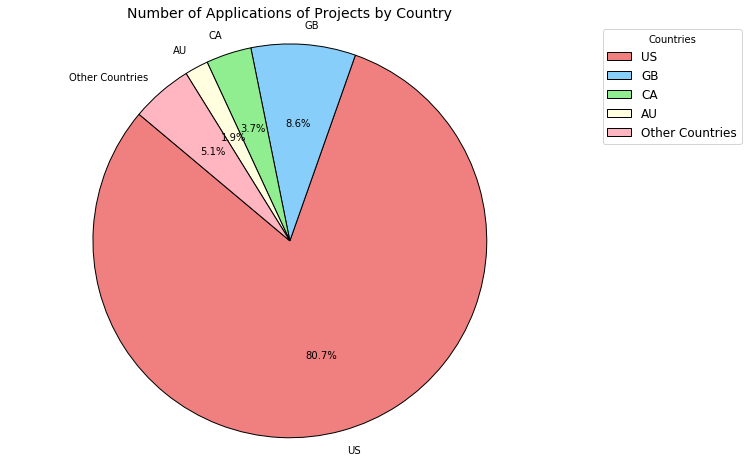

In [24]:
# Calculating the number of applications for projects
project_counts_by_country = df['country '].value_counts()

threshold = 3000

other_countries_count = project_counts_by_country[project_counts_by_country < threshold].sum()

project_counts_by_country = project_counts_by_country[project_counts_by_country >= threshold]
project_counts_by_country['Other Countries'] = other_countries_count

colors = ['lightcoral', 'lightskyblue', 'lightgreen', 'lightyellow', 'lightpink', 'lightgrey', 'lightseagreen', 'lightcyan', 'lightsteelblue', 'lightgreen']

# Visualization
plt.figure(figsize=(10, 8))
plt.pie(project_counts_by_country, labels=project_counts_by_country.index, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'linewidth': 1, 'edgecolor': 'black'})

# Adding descriptions showing colors by country on the right side
plt.legend(project_counts_by_country.index, title="Countries", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

plt.title('Number of Applications of Projects by Country', fontsize=14)
plt.axis('equal')
plt.show()

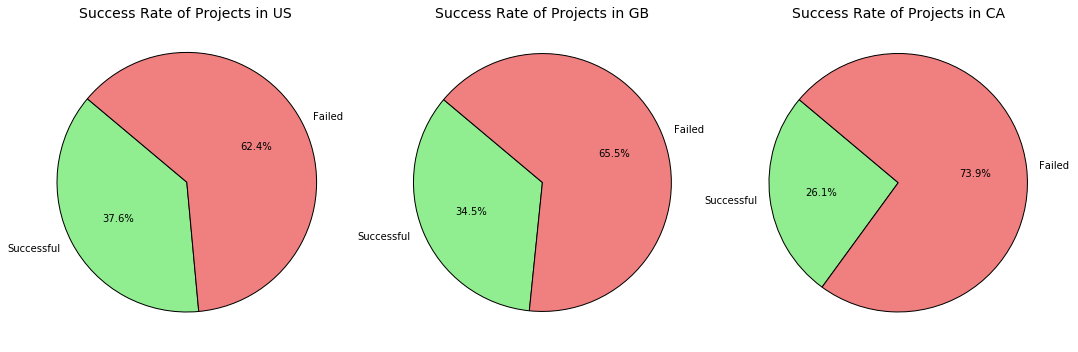

In [25]:
top_countries = ['US', 'GB', 'CA']

top_countries_projects = df[df['country '].isin(top_countries)]

success_counts_by_country = top_countries_projects[top_countries_projects['state '] == 'successful']['country '].value_counts()
total_counts_by_country = top_countries_projects['country '].value_counts()
success_rates_by_country = success_counts_by_country / total_counts_by_country * 100

plt.figure(figsize=(15, 5))

# Pie chart for US
plt.subplot(131)
plt.pie([success_rates_by_country['US'], 100 - success_rates_by_country['US']], labels=['Successful', 'Failed'], autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightcoral'], wedgeprops={'linewidth': 1, 'edgecolor': 'black'})
plt.title('Success Rate of Projects in US', fontsize=14)
plt.axis('equal')

# Pie chart for GB
plt.subplot(132)
plt.pie([success_rates_by_country['GB'], 100 - success_rates_by_country['GB']], labels=['Successful', 'Failed'], autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightcoral'], wedgeprops={'linewidth': 1, 'edgecolor': 'black'})
plt.title('Success Rate of Projects in GB', fontsize=14)
plt.axis('equal')

# Pie chart for CA
plt.subplot(133)
plt.pie([success_rates_by_country['CA'], 100 - success_rates_by_country['CA']], labels=['Successful', 'Failed'], autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightcoral'], wedgeprops={'linewidth': 1, 'edgecolor': 'black'})
plt.title('Success Rate of Projects in CA', fontsize=14)
plt.axis('equal')

plt.tight_layout()
plt.show()


Chi-Squared Statistic: 3259.7251157597834
P-value: 0.0


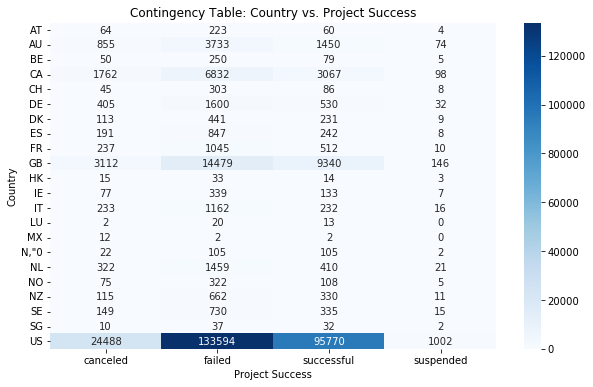

In [26]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['country '], df['state '])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Squared Statistic:", chi2)
print("P-value:", p)

plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d')
plt.title("Contingency Table: Country vs. Project Success")
plt.xlabel("Project Success")
plt.ylabel("Country")
plt.show()


C:\Anaconda3\envs\python-cvcourse\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


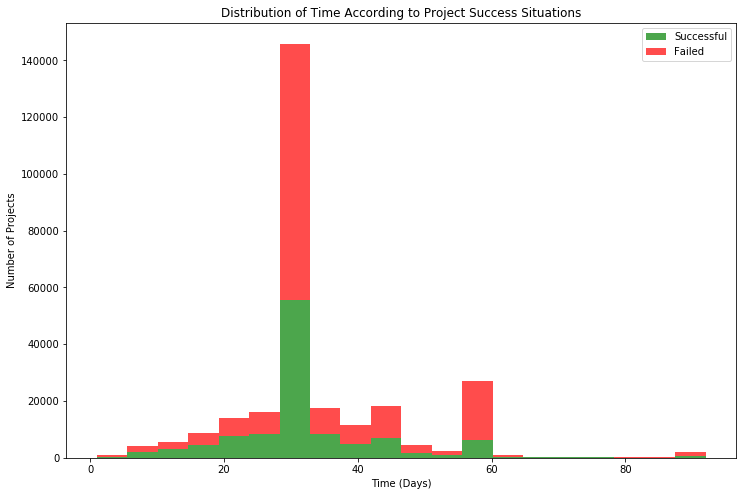

In [26]:
# setting the date format for the 'deadline' and 'launched' columns
df['deadline '] = pd.to_datetime(df['deadline '], format='%Y-%m-%d' , errors='coerce')
df['launched '] = pd.to_datetime(df['launched '], format='%Y-%m-%d' , errors='coerce')

# Calculating the time between the project start and end dates and add it as a column
df['duration '] = (df['deadline '] - df['launched ']).dt.days

#Visualization
plt.figure(figsize=(12, 8))
success_duration = df[df['state '] == 'successful']['duration ']
failed_duration = df[df['state '] == 'failed']['duration ']

plt.hist([success_duration, failed_duration], bins=20, label=['Successful', 'Failed'], color=['green', 'red'], alpha=0.7, stacked=True)
plt.xlabel('Time (Days)')
plt.ylabel('Number of Projects')
plt.title('Distribution of Time According to Project Success Situations')
plt.legend()
plt.show()

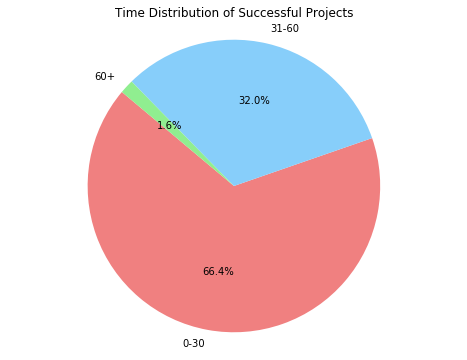

In [14]:
successful_projects['launched'] = pd.to_datetime(successful_projects['launched '], format='%Y-%m-%d' , errors='coerce')
successful_projects['deadline'] = pd.to_datetime(successful_projects['deadline '], format='%Y-%m-%d' , errors='coerce')
successful_projects['duration'] = (successful_projects['deadline '] - successful_projects['launched ']).dt.days

bins = [0, 30, 60, float('inf')]
labels = ['0-30', '31-60', '60+']
successful_projects['duration_group'] = pd.cut(successful_projects['duration'], bins=bins, labels=labels)

duration_counts = successful_projects['duration_group'].value_counts()

#Pie chart visualization
plt.figure(figsize=(8, 6))
plt.pie(duration_counts, labels=duration_counts.index, colors=['lightcoral', 'lightskyblue', 'lightgreen'], autopct='%1.1f%%', startangle=140)
plt.title("Time Distribution of Successful Projects")
plt.axis('equal')
plt.show()

In [27]:
successful_projects = df[df['state '] == 'successful']
average_duration_successful = successful_projects['duration '].mean()

print("The average duration of successful projects:", average_duration_successful)

The average duration of successful projects: 32.17632493522343


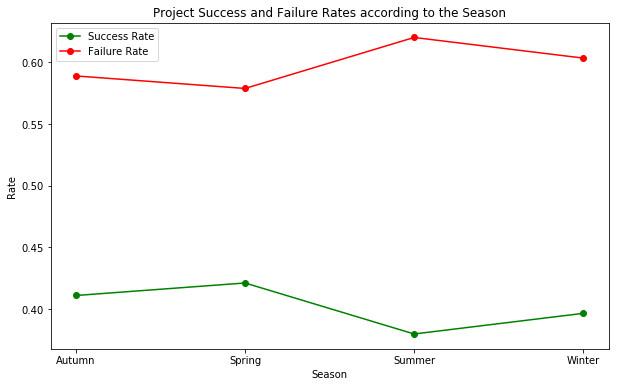

In [28]:
# Function that allows us to extract season information from the 'launched' column
def get_season(month):
    if month in [12, 1, 2]:  # Winter Season: December, January, February
        return 'Winter'
    elif month in [3, 4, 5]:  # Spring season: April May, March
        return 'Spring'
    elif month in [6, 7, 8]:  # Summer season: June, July, August
        return 'Summer'
    else:  # Autumn season: September, October, November
        return 'Autumn'
    

# Adding a new column by removing the season information from the 'launched' column
df['season'] = df['launched '].dt.month.apply(get_season)

# Calculating the success and failure numbers for each season and sorting them in order of seasons
season_counts = df['season'].value_counts().sort_index()
success_counts = df[df['state '] == 'successful']['season'].value_counts().sort_index()
failure_counts = df[df['state '] == 'failed']['season'].value_counts().sort_index()

success_rates = success_counts / (success_counts + failure_counts)
failure_rates = failure_counts / (success_counts + failure_counts)

# Creating line graphs
plt.figure(figsize=(10, 6))
plt.plot(success_rates.index, success_rates.values, marker='o', color='green', label='Success Rate')
plt.plot(failure_rates.index, failure_rates.values, marker='o', color='red', label='Failure Rate')
plt.xlabel('Season')
plt.ylabel('Rate')
plt.title('Project Success and Failure Rates according to the Season')
plt.legend()
plt.xticks(success_rates.index)
plt.show()

<Figure size 720x360 with 0 Axes>

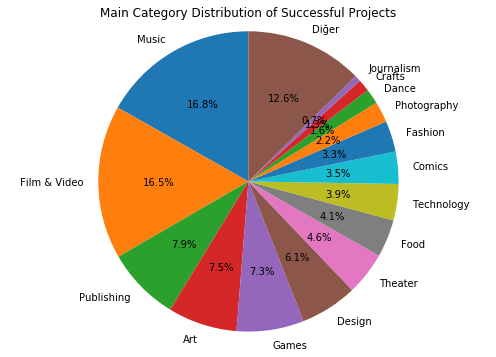

In [29]:
# Analyzing the distribution of successful projects by categories
success_category_counts = df[df['state '] == 'successful']['category '].value_counts()
success_main_category_counts = df[df['state '] == 'successful']['main_category '].value_counts()

threshold_for_maincat = 4
threshold_for_cat = 2

# Finding the indexes of categories above the threshold value
category_over_threshold = success_category_counts[success_category_counts >= success_category_counts.sum() * threshold_for_cat / 100].index
main_category_over_threshold = success_main_category_counts[success_main_category_counts >= success_main_category_counts.sum() * threshold_for_maincat / 100].index

# Grouping categories that are not above the threshold value as 'Other'
success_category_counts['Diğer'] = success_category_counts[~success_category_counts.index.isin(category_over_threshold)].sum()
success_main_category_counts['Diğer'] = success_main_category_counts[~success_main_category_counts.index.isin(main_category_over_threshold)].sum()

plt.figure(figsize=(10, 5))

plt.figure(figsize=(7, 5))
# Pie chart showing the main_category distribution
plt.pie(success_main_category_counts, labels=success_main_category_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Main Category Distribution of Successful Projects')

plt.tight_layout()
plt.show()


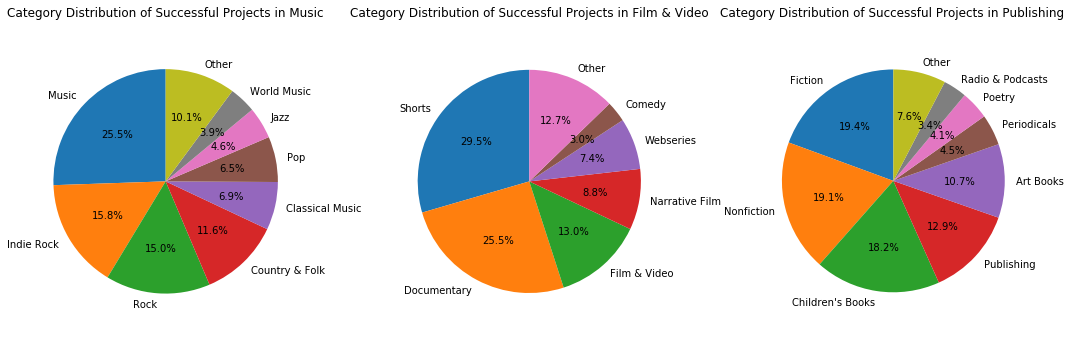

In [30]:
# Analyzing the distribution of categories under the three main categories of success
top_main_categories = success_main_category_counts.index[:3] 

threshold = 3

category_counts_by_main_category = {}
for main_category in top_main_categories:
    category_counts = df[(df['state '] == 'successful') & (df['main_category '] == main_category)]['category '].value_counts()
    category_percentages = category_counts / category_counts.sum() * 100
    
    # Eşiği aşan kategorileri "Diğer" olarak topla
    other_category_percentage = category_percentages[category_percentages < threshold].sum()
    category_percentages_over_threshold = category_percentages[category_percentages >= threshold]
    category_percentages_over_threshold['Other'] = other_category_percentage
    
    category_counts_by_main_category[main_category] = category_percentages_over_threshold

plt.figure(figsize=(15, 5))
for idx, main_category in enumerate(top_main_categories, 1):
    plt.subplot(1, 3, idx)
    plt.pie(category_counts_by_main_category[main_category], labels=category_counts_by_main_category[main_category].index, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title(f'Category Distribution of Successful Projects in {main_category}')

plt.tight_layout()
plt.show()


## 4. Feature Engineering:

In [31]:
df.dropna(inplace=True)
df["launched_day"]     = df["launched "].dt.weekday
df["is_weekend"]       = df["launched_day"].apply(lambda x: 1 if x > 4 else 0)
df['is_weekend'] = df['is_weekend'].astype(int)
df['launched_day'] = df['launched_day'].astype(int)
mean_is_weekend = df[df['state '] == 'successful']['is_weekend'].mean()
print("The average value of the is_weekend column in successful projects:", mean_is_weekend)

The average value of the is_weekend column in successful projects: 0.13550463826814407


In [32]:
df

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,duration,season,launched_day,is_weekend
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,58.0,Summer,1,0
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,45.0,Winter,5,1
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,30.0,Spring,5,1
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,55.0,Summer,5,1
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,35.0,Winter,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323745,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17 02:35:30,50000,2014-09-17 02:35:30,25,canceled,1,US,25,30.0,Autumn,2,0
323746,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19 03:35:14,1500,2011-06-22 03:35:14,155,failed,5,US,155,27.0,Summer,2,0
323747,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16 05:59:00,15000,2010-07-01 19:40:30,20,failed,1,US,20,45.0,Summer,3,0
323748,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13 02:00:00,15000,2016-01-13 18:13:53,200,failed,6,US,200,30.0,Winter,2,0


## 5. Feature Selecting:

In [33]:
# Droping unnecessary features
df.drop(['ID ', 'name '], axis=1, inplace=True)
# While the duration and season features have been derived, we no longer need the deadline and launched information
df.drop(['deadline ', 'launched '], axis=1, inplace=True)
df.dropna(inplace=True)#the process of deleting null lines

In [34]:
df

,category,main_category,currency,goal,pledged,state,backers,country,usd pledged,duration,season,launched_day,is_weekend
0,Poetry,Publishing,GBP,1000,0,failed,0,GB,0,58.0,Summer,1,0
1,Narrative Film,Film & Video,USD,45000,220,failed,3,US,220,45.0,Winter,5,1
2,Music,Music,USD,5000,1,failed,1,US,1,30.0,Spring,5,1
3,Film & Video,Film & Video,USD,19500,1283,canceled,14,US,1283,55.0,Summer,5,1
4,Restaurants,Food,USD,50000,52375,successful,224,US,52375,35.0,Winter,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323745,Documentary,Film & Video,USD,50000,25,canceled,1,US,25,30.0,Autumn,2,0
323746,Narrative Film,Film & Video,USD,1500,155,failed,5,US,155,27.0,Summer,2,0
323747,Narrative Film,Film & Video,USD,15000,20,failed,1,US,20,45.0,Summer,3,0
323748,Technology,Technology,USD,15000,200,failed,6,US,200,30.0,Winter,2,0


In [35]:
# Dividing the duration column into 3 different groups (0-30, 31-60, 60 and above)
bins = [0, 30, 60, float('inf')]
labels = [0, 1, 2]
df['duration '] = pd.cut(df['duration '], bins=bins, labels=labels, right=False).astype(int)

In [36]:
state_mapping = {'failed': 0, 'canceled': 0, 'suspended':0, 'successful': 1}
df['state '] = df['state '].map(state_mapping)

In [37]:
df.dropna(inplace=True)

In [38]:
# Creating a mapping dictionary for the seasons
season_mapping = {
    'Winter': 1,
    'Spring': 2,
    'Summer': 3,
    'Autumn': 4,
}

df['season'] = df['season'].map(season_mapping)

In [39]:
unique_categories = df['main_category '].nunique()

print("The total number of different categories:", unique_categories)
unique_categories = df['main_category '].unique()

print("Different categories:", unique_categories)

The total number of different categories: 15
Different categories: ['Publishing' 'Film & Video' 'Music' 'Food' 'Design' 'Crafts' 'Games'
 'Comics' 'Fashion' 'Theater' 'Art' 'Photography' 'Technology' 'Dance'
 'Journalism']


In [40]:
#One-Hot Encoding for main category
df_encoded = pd.get_dummies(df, columns=['main_category '])
df_encoded

,category,currency,goal,pledged,state,backers,country,usd pledged,duration,season,...,main_category _Fashion,main_category _Film & Video,main_category _Food,main_category _Games,main_category _Journalism,main_category _Music,main_category _Photography,main_category _Publishing,main_category _Technology,main_category _Theater
0,Poetry,GBP,1000,0,0,0,GB,0,1,3,...,0,0,0,0,0,0,0,1,0,0
1,Narrative Film,USD,45000,220,0,3,US,220,1,1,...,0,1,0,0,0,0,0,0,0,0
2,Music,USD,5000,1,0,1,US,1,1,2,...,0,0,0,0,0,1,0,0,0,0
3,Film & Video,USD,19500,1283,0,14,US,1283,1,3,...,0,1,0,0,0,0,0,0,0,0
4,Restaurants,USD,50000,52375,1,224,US,52375,1,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323745,Documentary,USD,50000,25,0,1,US,25,1,4,...,0,1,0,0,0,0,0,0,0,0
323746,Narrative Film,USD,1500,155,0,5,US,155,0,3,...,0,1,0,0,0,0,0,0,0,0
323747,Narrative Film,USD,15000,20,0,1,US,20,1,3,...,0,1,0,0,0,0,0,0,0,0
323748,Technology,USD,15000,200,0,6,US,200,1,1,...,0,0,0,0,0,0,0,0,1,0


In [41]:
unique_categories = df_encoded['currency '].nunique()

print("The total number of different categories:", unique_categories)
unique_categories = df_encoded['currency '].unique()

print("Different categories:", unique_categories)

The total number of different categories: 13
Different categories: ['GBP' 'USD' 'CAD' 'NOK' 'AUD' 'EUR' 'SEK' 'NZD' 'CHF' 'DKK' 'SGD' 'HKD'
 'MXN']


In [42]:
df_encoded['backers '].fillna(0, inplace=True)
df_encoded['backers '] = df_encoded['backers '].astype(int)
#the binning process for the backers column
df_encoded['backers_bins'] = pd.qcut(df_encoded['backers '], q=20, labels=False, duplicates='drop')

In [43]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# converting currency column with label encoder
df_encoded['currency_encoded'] = label_encoder.fit_transform(df_encoded['currency '])

In [44]:
# Deleting columns that we will not use in modeling
columns_to_drop = ['category ', 'currency ', 'backers ']
df_encoded.drop(columns=columns_to_drop, axis=1, inplace=True)

In [45]:
unique_categories = df_encoded['country '].nunique()

print("The total number of different categories:", unique_categories)
unique_categories = df_encoded['country '].unique()

print("Different categories:", unique_categories)

The total number of different categories: 22
Different categories: ['GB' 'US' 'CA' 'NO' 'AU' 'IT' 'DE' 'IE' 'ES' 'SE' 'NL' 'NZ' 'CH' 'BE'
 'DK' 'FR' 'LU' 'AT' 'N,"0' 'SG' 'HK' 'MX']


In [46]:
label_encoder = LabelEncoder()

# converting country column with label encoder
df_encoded['country_encoded'] = label_encoder.fit_transform(df_encoded['country '])

In [47]:
# Deleting columns that we will not use in modeling
columns_to_drop = ['country ']
df_encoded.drop(columns=columns_to_drop, axis=1, inplace=True)

In [48]:
skewness = df['goal '].skew()
print("Skewness:", skewness)

Skewness: 71.96138586542884


In [49]:
from sklearn.preprocessing import MinMaxScaler

# Using MinMaxScaler to normalize the Goal column
scaler = MinMaxScaler()
df_encoded['normalized_goal'] = scaler.fit_transform(df_encoded[['goal ']])

In [50]:
# usd pledged column was dropped to prevent over fitting
columns_to_drop = ["goal ", "pledged ","usd pledged ","backers_bins"]
df_encoded.drop(columns=columns_to_drop, axis=1, inplace=True)

In [54]:
df_encoded

,state,duration,season,launched_day,is_weekend,main_category _Art,main_category _Comics,main_category _Crafts,main_category _Dance,main_category _Design,...,main_category _Games,main_category _Journalism,main_category _Music,main_category _Photography,main_category _Publishing,main_category _Technology,main_category _Theater,currency_encoded,country_encoded,normalized_goal
0,0,1,3,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,5,9,0.000010
1,0,1,1,5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,12,21,0.000450
2,0,1,2,5,1,0,0,0,0,0,...,0,0,1,0,0,0,0,12,21,0.000050
3,0,1,3,5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,12,21,0.000195
4,1,1,1,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,12,21,0.000500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323745,0,1,4,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,12,21,0.000500
323746,0,0,3,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,12,21,0.000015
323747,0,1,3,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,12,21,0.000150
323748,0,1,1,2,0,0,0,0,0,0,...,0,0,0,0,0,1,0,12,21,0.000150


## 6.Modelling

In [55]:
import pandas as pd
import matplotlib.pyplot as plt


import numpy as np
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [56]:
train_df,test_df = train_test_split(df_encoded,test_size = 0.3,random_state = 42)

In [57]:
# creating x_train and x_test data
x_train = train_df.drop(["state "], axis=1)
x_test = test_df.drop(["state "], axis=1)

# creating y_train and y_test data
y_train = train_df["state "]
y_test = test_df["state "]

y_train = y_train.astype('int')
y_test = y_test.astype('int')


In [58]:
print("x_train",len(x_train))
print("y_train",len(y_train))
print("x_test",len(x_test))
print("y_test",len(y_test))

x_train 220591
y_train 220591
x_test 94540
y_test 94540


Accuracy: 0.6614237359847683
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.89      0.77     60642
           1       0.56      0.24      0.34     33898

    accuracy                           0.66     94540
   macro avg       0.62      0.57      0.56     94540
weighted avg       0.64      0.66      0.62     94540



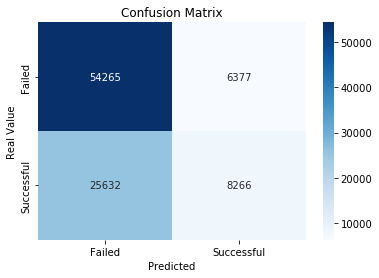

In [62]:
# Creating a Logistic Regression model
logreg = linear_model.LogisticRegression(max_iter=1000)
logreg.fit(x_train, y_train)

# Evaluation of the model with test data
y_pred = logreg.predict(x_test)

# Calculate the Accuracy
accuracy = logreg.score(x_test, y_test)
print("Accuracy:", accuracy)

# Calculating the Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Creating a Complexity Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualization
class_labels = ["Failed", "Successful"]
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Real Value')
plt.show()


In [61]:
model = LogisticRegression(max_iter=1000)
# doing 5-fold cross-validation
cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='f1')

print("Cross Validation Results for Logistic Regression:")
print(cv_scores)
print("Mean F1 Score:", cv_scores.mean()) 

Cross Validation Results for Logistic Regression:
[0.33720161 0.34322444 0.34282167 0.34504651 0.33769354]
Mean F1 Score: 0.3411975552254469


Random Forest Score 0.6375819758832241
Classification Report:
               precision    recall  f1-score   support

      Failed       0.70      0.77      0.73     60642
  Successful       0.49      0.39      0.44     33898

    accuracy                           0.64     94540
   macro avg       0.59      0.58      0.59     94540
weighted avg       0.62      0.64      0.63     94540



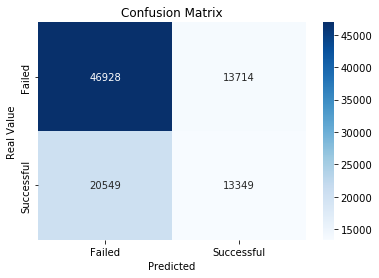

In [63]:
#Random Forest model

rf = RandomForestClassifier(n_estimators = 100 , random_state = 42)
rf.fit(x_train,y_train)

predictons = rf.predict(x_test)
predictons = predictons.astype('int')

# Calculating the accuracy rate
rfscore = rf.score(x_test,y_test)
print("Random Forest Score", rfscore)

class_labels = ["Failed","Successful"]
class_report = classification_report(y_test, predictons, target_names=class_labels)
print("Classification Report:\n", class_report)

cm = confusion_matrix(y_test, predictons)
class_labels = ["Failed","Successful"]
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Real Value')

plt.show()

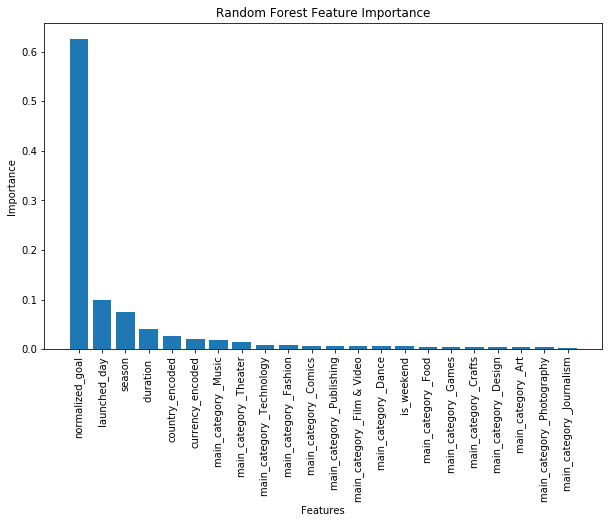

In [64]:
# Finding feature importance
rf.fit(x_train,y_train)

feature_importances = pd.DataFrame(rf.feature_importances_, index=x_train.columns, columns=['importance'])
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importances.index, feature_importances['importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importance')
plt.show()

In [65]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

cv_scores = cross_val_score(rf, x_train, y_train, cv=5, scoring='f1')

print("Cross Validation Results for Random Forest:")
print(cv_scores)
print("Mean F1 Score:", cv_scores.mean())


Cross Validation Results for Random Forest:
[0.44108571 0.44283211 0.43865031 0.44092057 0.43946757]
Mean F1 Score: 0.4405912520525913


Naive Bayes score :  0.5328538184895283
Classification Report:
               precision    recall  f1-score   support

      Failed       0.78      0.38      0.51     60642
  Successful       0.42      0.80      0.55     33898

    accuracy                           0.53     94540
   macro avg       0.60      0.59      0.53     94540
weighted avg       0.65      0.53      0.53     94540



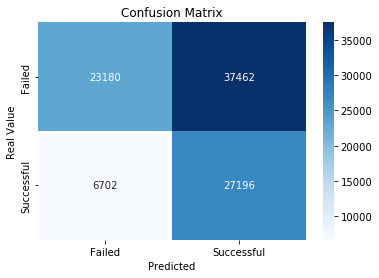

In [66]:
#Naive Bayes

nb = GaussianNB()
nb.fit(x_train,y_train)

predictons = nb.predict(x_test)
predictons = predictons.astype('int')
nbscore = nb.score(x_test,y_test)
print("Naive Bayes score : ", nbscore)

# Sınıflandırma raporunu oluştur<
class_report = classification_report(y_test, predictons, target_names=class_labels)
print("Classification Report:\n", class_report)

cm = confusion_matrix(y_test, predictons)
class_labels = ["Failed","Successful"]
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)


plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Real Value')


plt.show()


In [67]:
nb = GaussianNB()

cv_scores = cross_val_score(nb, x_train, y_train, cv=5, scoring='f1')

print("Cross Validation Results for Naive Bayes:")
print(cv_scores)
print("Mean F1 Score:", cv_scores.mean())


Cross Validation Results for Naive Bayes:
[0.55221938 0.54796306 0.55180092 0.5504691  0.55034843]
Mean F1 Score: 0.5505601781120909


Decision trees score 0.6297334461603554
Classification Report:
               precision    recall  f1-score   support

      Failed       0.69      0.78      0.73     60642
  Successful       0.48      0.36      0.41     33898

    accuracy                           0.63     94540
   macro avg       0.58      0.57      0.57     94540
weighted avg       0.61      0.63      0.62     94540



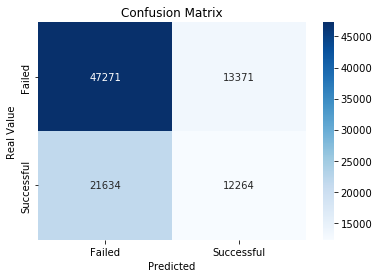

In [68]:
#Decision trees model

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)


predictons = dt.predict(x_test)
predictons = predictons.astype('int')
dtscore = dt.score(x_test,y_test)
print("Decision trees score", dtscore)

# Sınıflandırma raporunu oluştur
class_labels = ["Failed","Successful"]
class_report = classification_report(y_test, predictons, target_names=class_labels)
print("Classification Report:\n", class_report)

cm = confusion_matrix(y_test, predictons)
class_labels = ["Failed","Successful"]
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)


plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Real Value')


plt.show()

In [69]:
dt = DecisionTreeClassifier()

cv_scores = cross_val_score(dt, x_train, y_train, cv=5, scoring='f1')

print("Cross Validation Results for Decision trees:")
print(cv_scores)
print("Mean F1 Score:", cv_scores.mean())

Cross Validation Results for Decision trees:
[0.41893575 0.41404237 0.41401793 0.41454519 0.41261054]
Mean F1 Score: 0.41483035770091065


C:\Anaconda3\envs\python-cvcourse\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBoost Classifier Score: 0.6797969113602708
Classification Report:
               precision    recall  f1-score   support

      Failed       0.71      0.85      0.77     60642
  Successful       0.58      0.37      0.45     33898

    accuracy                           0.68     94540
   macro avg       0.65      0.61      0.61     94540
weighted avg       0.66      0.68      0.66     94540



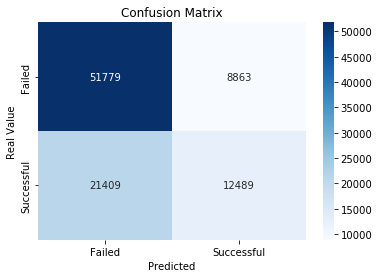

In [70]:
# XGBClassifier model
xgb = XGBClassifier(n_estimators=100, random_state=42, eval_metric='error')

xgb.fit(x_train, y_train)

predictions = xgb.predict(x_test)
predictions = predictions.astype('int')

xgb_score = xgb.score(x_test, y_test)
print("XGBoost Classifier Score:", xgb_score)

class_labels = ["Failed", "Successful"]
class_report = classification_report(y_test, predictions, target_names=class_labels)
print("Classification Report:\n", class_report)

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Real Value')

plt.show()

In [72]:
xgb = XGBClassifier(n_estimators=100, random_state=42, eval_metric='error',use_label_encoder=False)

cv_scores = cross_val_score(xgb, x_train, y_train, cv=5, scoring='f1')

print("Cross Validation Results for XGBClassifier:")
print(cv_scores)

mean_cv_score = cv_scores.mean()
print("Mean F1 Score:", mean_cv_score)

Cross Validation Results for XGBClassifier:
[0.44581367 0.45047712 0.45284197 0.45285224 0.4482557 ]
Mean F1 Score: 0.4500481417929384


Gradient Boosting Classifier Score: 0.6782314364290247
Classification Report:
               precision    recall  f1-score   support

      Failed       0.70      0.88      0.78     60642
  Successful       0.59      0.32      0.42     33898

    accuracy                           0.68     94540
   macro avg       0.65      0.60      0.60     94540
weighted avg       0.66      0.68      0.65     94540



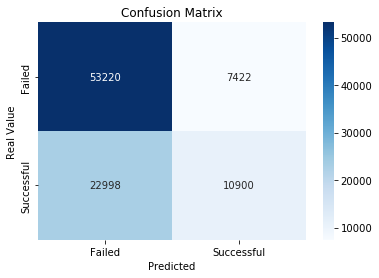

In [73]:
#GradientBoostingClassifier model
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)

gb.fit(x_train, y_train)

predictons = gb.predict(x_test)

predictons = predictons.astype('int')

gb_score = gb.score(x_test, y_test)
print("Gradient Boosting Classifier Score:", gb_score)

class_labels = ["Failed", "Successful"]
class_report = classification_report(y_test, predictons, target_names=class_labels)
print("Classification Report:\n", class_report)


cm = confusion_matrix(y_test, predictons)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Real Value')
plt.show()

In [74]:
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)

f1_scores = cross_val_score(gb,x_train, y_train, cv=5, scoring='f1')

print("Cross Validation Results for GradientBoostingClassifier:", f1_scores)

mean_f1_score = f1_scores.mean()
print("Mean F1 Score:", mean_f1_score)


Cross Validation Results for GradientBoostingClassifier: [0.41022054 0.41450261 0.41591859 0.42476643 0.40914172]
Mean F1 Score: 0.414909978679389


## 7.Result

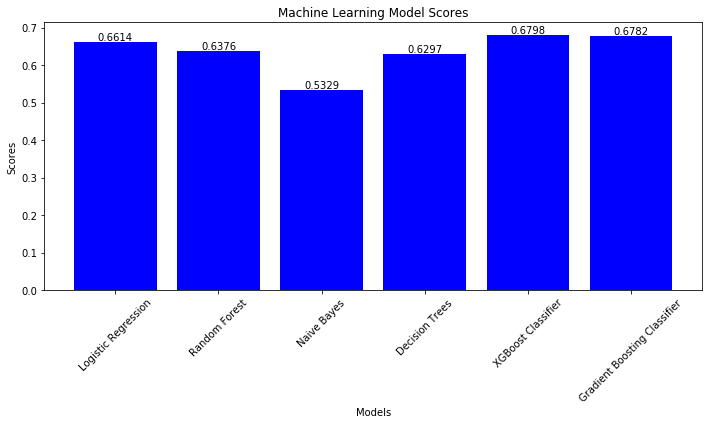

In [76]:
model_scores = [ accuracy, rfscore, nbscore, dtscore, xgb_score, gb_score]
model_names = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'Decision Trees', 'XGBoost Classifier', 'Gradient Boosting Classifier']

plt.figure(figsize=(10, 6))
plt.bar(model_names, model_scores, color='blue')

plt.title('Machine Learning Model Scores')
plt.xlabel('Models')
plt.ylabel('Scores')

for name, score in zip(model_names, model_scores):
    plt.text(name, score, f'{score:.4f}', ha='center', va='bottom')

plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()
